In [ ]:
import pandas as pd

# Load the Excel file using the openpyxl engine
df = pd.read_excel("/content/Fully_Cleaned_Titles_Final (1).xlsx", engine='openpyxl')

# Display the first few rows and columns to understand the structure
print("Data Shape:", df.shape)
print(df.head())
print("Columns:", df.columns.tolist())

Data Shape: (11992, 4)
               Title Name in Lower                       Hindi Title  \
0  2001 incoporating science today  2001 आज का विज्ञान सम्मिलित करना   
1                         24 today                             24 आज   
2                         4u times                        4यू टाइम्स   
3                    6am newstimes              सुबह 6 बजे का समाचार   
4                     7 days times                      7 दिन का समय   

             Cleaned English Title           Cleaned Hindi Title  
0  2001 incoporating science today   आज का विज्ञान सम्मिलित करना  
1                         24 today                            आज  
2                         4u times                     यू टाइम्स  
3                    6am newstimes           सुबह  बजे का समाचार  
4                     7 days times                    दिन का समय  
Columns: ['Title Name in Lower', 'Hindi Title', 'Cleaned English Title', 'Cleaned Hindi Title']


In [ ]:
# Remove rows that are completely empty
df = df.dropna(how="all")

# If your dataset has a column for titles, e.g., "Title Name", remove duplicates:
if "Title Name" in df.columns:
    df = df.drop_duplicates(subset=["Title Name"], keep="first")
    print("Cleaned Data Shape:", df.shape)
else:
    print("Please check your dataset for the title column name.")

Please check your dataset for the title column name.


In [ ]:
!pip install unidecode

In [ ]:
# Print all columns to verify column names
print(df.columns)

# Use the correct column name from the dataset
if "Normalized Title" in df.columns:
    df = df.drop_duplicates(subset="Normalized Title")
    print("✅ Duplicates removed based on 'Normalized Title'.")
else:
    print("⚠️ Column 'Normalized Title' not found. Check the available columns above.")


Index(['Title Name in Lower', 'Hindi Title', 'Cleaned English Title',
       'Cleaned Hindi Title'],
      dtype='object')
⚠️ Column 'Normalized Title' not found. Check the available columns above.


In [ ]:
#improved code

import pandas as pd
import re
from unidecode import unidecode
from nltk.metrics import edit_distance
from collections import defaultdict
import jellyfish

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = unidecode(title)  # Normalize accents & special characters
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Function to compute Levenshtein similarity
def levenshtein_similarity(title1, title2):
    max_len = max(len(title1), len(title2))
    return 1 - (edit_distance(title1, title2) / max_len) if max_len > 0 else 1.0

# Function to find the most similar titles
def find_most_similar_titles(new_title, existing_titles, threshold=80):
    new_title = normalize_title(new_title)
    similar_titles = [
        (existing_title, levenshtein_similarity(new_title, existing_title) * 100)
        for existing_title in existing_titles
    ]
    # Filter by threshold & sort
    similar_titles = [(title, score) for title, score in similar_titles if score >= threshold]
    similar_titles.sort(key=lambda x: x[1], reverse=True)

    return similar_titles[:10]  # Return Top 10

# Test with a sample title
input_title = "indian times"
existing_titles = df["Normalized Title"].tolist()

# Get results
similar_titles_list = find_most_similar_titles(input_title, existing_titles)

# Display results
print("\n🔍 **Top Similar Titles (Levenshtein Distance):**")
for title, score in similar_titles_list:
    print(f"{title}: {score:.2f}% similarity")



🔍 **Top Similar Titles (Levenshtein Distance):**
indian times: 100.00% similarity
pandian times: 84.62% similarity
india timer: 83.33% similarity
indica times: 83.33% similarity
indira times: 83.33% similarity
iniyan times: 83.33% similarity


In [ ]:
import pandas as pd
import re
from unidecode import unidecode
from nltk.metrics import edit_distance
from nltk.corpus import stopwords
from collections import defaultdict
import jellyfish

# Load the cleaned dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()  # Convert to lowercase
    title = unidecode(title)  # Convert Unicode to ASCII (handle accents, special characters)
    title = re.sub(r'[^a-z0-9\s]', '', title)  # Remove non-alphanumeric characters
    title = re.sub(r'\s+', ' ', title).strip()  # Remove extra spaces
    return title

# Apply normalization to the titles
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Display updated DataFrame
df.head()

# Function to normalize text without unidecode
def normalize_title(title):
    title = str(title).lower()  # Convert to lowercase
    title = re.sub(r'[^a-z0-9\s]', '', title)  # Remove non-alphanumeric characters
    title = re.sub(r'\s+', ' ', title).strip()  # Remove extra spaces
    return title

# Apply normalization to the titles
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Display updated DataFrame
df.head()

# Function to compute Soundex encoding
def get_soundex(title):
    return jellyfish.soundex(title)

# Apply Soundex encoding
df["Soundex"] = df["Normalized Title"].apply(get_soundex)

# Display updated DataFrame
df.head()

# Function to compute Levenshtein similarity
def levenshtein_similarity(title1, title2):
    max_len = max(len(title1), len(title2))
    if max_len == 0:
        return 1.0  # If both strings are empty, they are identical
    return 1 - (edit_distance(title1, title2) / max_len)

# Example: Compute similarity of the first two titles in the dataset
sample_title1 = df.loc[2, "Normalized Title"]
sample_title2 = df.loc[1, "Normalized Title"]

similarity_score = levenshtein_similarity(sample_title1, sample_title2) * 100

# Show sample similarity score
round(similarity_score,2)


# Function to compare a new title against all existing titles and return the most similar ones
def find_most_similar_titles(new_title, existing_titles, threshold=80):
    similar_titles = []

    for existing_title in existing_titles:
        similarity = levenshtein_similarity(new_title, existing_title) * 100  # Convert to percentage
        if similarity >= threshold:  # Only keep highly similar titles
            similar_titles.append((existing_title, similarity))

    # Sort by similarity in descending order (most similar first)
    similar_titles.sort(key=lambda x: x[1], reverse=True)

    return similar_titles

# Test with a new title
new_title = "indian times"
existing_titles = df["Normalized Title"].tolist()

# Find similar titles
similar_titles_list = find_most_similar_titles(new_title, existing_titles, threshold=80)

# Display results
similar_titles_list[:10]  # Show top 10 similar titles



[('indian times', 100.0),
 ('pandian times', 84.61538461538461),
 ('india timer', 83.33333333333334),
 ('indica times', 83.33333333333334),
 ('indira times', 83.33333333333334),
 ('iniyan times', 83.33333333333334)]

In [ ]:
import pandas as pd

# Load the dataset (Make sure the file is in the same directory or provide full path)
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Extract the correct column
titles = df['Cleaned English Title'].dropna().astype(str).tolist()  # Ensure it's a list of strings

# Display sample titles to confirm loading
print("✅ Sample Titles:", titles[:5])  # Print the first 5 titles


✅ Sample Titles: ['2001 incoporating science today', '24 today', '4u times', '6am newstimes', '7 days times']


In [ ]:
#Improved code

import pandas as pd

# Function to compute Jaccard Similarity
def jaccard_similarity(title1, title2):
    set1 = set(title1.lower().split())
    set2 = set(title2.lower().split())
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Function to find most similar titles using Jaccard Similarity
def find_most_similar_titles_jaccard(new_title, existing_titles):
    new_title = new_title.lower()
    jaccard_scores = [(title, jaccard_similarity(new_title, title)) for title in existing_titles]

    # Sort by similarity in descending order
    jaccard_scores.sort(key=lambda x: x[1], reverse=True)

    return jaccard_scores[:5]  # Return Top 5 matches

# Load dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Extract titles
titles = df["Title Name in Lower"].astype(str).tolist()

# Test with a sample title
input_title = "news today"
similar_titles = find_most_similar_titles_jaccard(input_title, titles)

# Print results
print("\n🔍 **Top 5 Similar Titles (Jaccard Similarity):**")
for title, score in similar_titles:
    print(f"{title}: {score:.2f}")



🔍 **Top 5 Similar Titles (Jaccard Similarity):**
news today: 1.00
today news: 1.00
ambition news today: 0.67
arsh news today: 0.67
bharatvarsh news today: 0.67


In [ ]:
import numpy as np

def jaccard_similarity(title1, title2):
    """Computes Jaccard Similarity between two titles."""
    set1 = set(title1.lower().split())  # Tokenize words
    set2 = set(title2.lower().split())
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0

# Example: Compare with all dataset titles
input_title = "news today"

# Compute similarity for each title
jaccard_scores = [(title, jaccard_similarity(input_title, title)) for title in titles]

# Sort by similarity (highest first)
jaccard_scores.sort(key=lambda x: x[1], reverse=True)

# Print top 5 most similar titles
print("\n🔍 Top 5 Similar Titles (Jaccard Similarity):")
for title, score in jaccard_scores[:5]:
    print(f"{title}: {score:.2f}")



🔍 Top 5 Similar Titles (Jaccard Similarity):
news today: 1.00
today news: 1.00
ambition news today: 0.67
arsh news today: 0.67
bharatvarsh news today: 0.67


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Extract titles
titles = df["Normalized Title"].tolist()

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the titles
tfidf_matrix = vectorizer.fit_transform(titles)

# Function to compute cosine similarity
def find_most_similar_titles_cosine(new_title, existing_titles, tfidf_matrix, vectorizer, top_n=5):
    new_title = normalize_title(new_title)

    # Transform the new title using the same vectorizer
    new_title_vector = vectorizer.transform([new_title])

    # Compute cosine similarity with all existing titles
    cosine_similarities = cosine_similarity(new_title_vector, tfidf_matrix).flatten()

    # Get indices of top similar titles
    similar_indices = cosine_similarities.argsort()[::-1][:top_n]

    # Get top similar titles
    similar_titles = [(existing_titles[i], cosine_similarities[i]) for i in similar_indices]

    return similar_titles

# Test with a sample title
input_title = "India times"
similar_titles_list = find_most_similar_titles_cosine(input_title, titles, tfidf_matrix, vectorizer)

# Print results
print("\n🔍 **Top 5 Similar Titles (Cosine Similarity - TF-IDF):**")
for title, score in similar_titles_list:
    print(f"{title}: {score:.4f}")



🔍 **Top 5 Similar Titles (Cosine Similarity - TF-IDF):**
u p india times: 1.0000
india: 0.8719
k m j india: 0.8719
w w f india: 0.8719
c r c india: 0.8719


In [ ]:
import pandas as pd
import re
import jellyfish

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)


# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Function to compute Soundex encoding
def get_soundex(title):
    return jellyfish.soundex(title)

# Apply Soundex encoding to dataset
df["Soundex"] = df["Normalized Title"].apply(get_soundex)

# Function to find similar titles based on Soundex
def find_similar_titles_soundex(new_title, df, top_n=5):
    new_title = normalize_title(new_title)
    new_soundex = get_soundex(new_title)

    # Find all titles with the same Soundex encoding
    matching_titles = df[df["Soundex"] == new_soundex]["Normalized Title"].tolist()

    return matching_titles[:top_n]

# Test with a sample input
input_title = "India Times"
similar_titles_list = find_similar_titles_soundex(input_title, df)

# Display results
print("\n🔍 **Top Similar Titles (Soundex Matching):**")
for title in similar_titles_list:
    print(title)



🔍 **Top Similar Titles (Soundex Matching):**
aam awaz times
amaze times
amnesty today
ams times
anas times


In [ ]:
#Metaphone Matching
import pandas as pd
import re
import jellyfish

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Function to compute Metaphone encoding
def get_metaphone(title):
    words = title.split()
    return " ".join([jellyfish.metaphone(word) for word in words])

# Apply Metaphone encoding to dataset
df["Metaphone"] = df["Normalized Title"].apply(get_metaphone)

# Function to find the closest matches using Metaphone similarity
def find_similar_titles_metaphone(new_title, df, top_n=5):
    new_title = normalize_title(new_title)
    new_metaphone = get_metaphone(new_title)

    # Compute similarity scores based on Metaphone
    df["Similarity"] = df["Metaphone"].apply(lambda x: jellyfish.jaro_winkler_similarity(new_metaphone, x))

    # Sort by highest similarity and get top matches
    similar_titles = df.sort_values(by="Similarity", ascending=False)["Normalized Title"].head(top_n).tolist()

    return similar_titles

# Test with a sample input
input_title = "india Times"
similar_titles_list = find_similar_titles_metaphone(input_title, df)

# Display results
print("\n🔍 **Top Similar Titles (Metaphone Matching):**")
for title in similar_titles_list:
    print(title)



🔍 **Top Similar Titles (Metaphone Matching):**
anuja times
anugya times
angira times
anjali times
anna times


In [ ]:
!pip install fuzzy


In [ ]:
!pip install metaphone


In [ ]:
!pip install phonetics


In [ ]:
import pandas as pd
import re
from metaphone import doublemetaphone  # Correct library for Double Metaphone
import phonetics

# Function to compute Double Metaphone encoding
def get_double_metaphone(title):
    return phonetics.dmetaphone(title)

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Function to compute Double Metaphone encoding
def get_double_metaphone(title):
    words = title.split()
    return " ".join([doublemetaphone(word)[0] for word in words if doublemetaphone(word)[0]])

# Apply Double Metaphone encoding to dataset
df["Double Metaphone"] = df["Normalized Title"].apply(get_double_metaphone)

# Function to find the closest matches using Double Metaphone
def find_similar_titles_double_metaphone(new_title, df, top_n=5):
    new_title = normalize_title(new_title)
    new_double_metaphone = get_double_metaphone(new_title)

    # Compute similarity scores based on Double Metaphone
    df["Similarity"] = df["Double Metaphone"].apply(lambda x: jellyfish.jaro_winkler_similarity(new_double_metaphone, x))

    # Sort by highest similarity and get top matches
    similar_titles = df.sort_values(by="Similarity", ascending=False)["Normalized Title"].head(top_n).tolist()

    return similar_titles

# Test with a sample input
input_title = "India Times"
similar_titles_list = find_similar_titles_double_metaphone(input_title, df)

# Display results
print("\n🔍 **Top Similar Titles (Double Metaphone Matching):**")
for title in similar_titles_list:
    print(title)



🔍 **Top Similar Titles (Double Metaphone Matching):**
anuja times
anjali times
angira times
energy times
infoage times


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"
df = pd.read_excel(file_path)

# Function to normalize text
def normalize_title(title):
    title = str(title).lower()
    title = re.sub(r'[^a-z0-9\s]', '', title)
    title = re.sub(r'\s+', ' ', title).strip()
    return title

# Apply normalization
df["Normalized Title"] = df["Title Name in Lower"].apply(normalize_title)

# Extract titles
titles = df["Normalized Title"].tolist()

# Initialize CountVectorizer for Bag of Words representation
vectorizer = CountVectorizer()

# Fit and transform the titles
bow_matrix = vectorizer.fit_transform(titles)

# Function to compute similarity using BoW
def find_most_similar_titles_bow(new_title, existing_titles, bow_matrix, vectorizer, top_n=5):
    new_title = normalize_title(new_title)

    # Transform the new title using the same vectorizer
    new_title_vector = vectorizer.transform([new_title])

    # Compute cosine similarity
    cosine_similarities = cosine_similarity(new_title_vector, bow_matrix).flatten()

    # Get indices of top similar titles
    similar_indices = cosine_similarities.argsort()[::-1][:top_n]

    # Get top similar titles
    similar_titles = [(existing_titles[i], cosine_similarities[i]) for i in similar_indices]

    return similar_titles

# Test with a sample input
input_title = "India Times"
similar_titles_list = find_most_similar_titles_bow(input_title, titles, bow_matrix, vectorizer)

# Print results
print("\n🔍 **Top 5 Similar Titles (Bag of Words - Cosine Similarity):**")
for title, score in similar_titles_list:
    print(f"{title}: {score:.4f}")



🔍 **Top 5 Similar Titles (Bag of Words - Cosine Similarity):**
u p india times: 1.0000
royal india times: 0.8165
india crime times: 0.8165
i win india times: 0.8165
up india times: 0.8165


In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"  # Ensure the file is in the same directory or provide full path
df = pd.read_excel(file_path)

# Standardizing column names (if necessary)
df.columns = df.columns.str.strip()

# Identify the relevant column (adjust if necessary)
title_column = "Title Name in Lower"  # Change based on actual column name

# Define common prefixes and suffixes to remove
common_words = ["The", "India", "News", "Daily", "Times", "Report"]

# Function to clean titles
def clean_title(title):
    words = title.split()
    words = [word for word in words if word not in common_words]
    return " ".join(words)

# Apply cleaning function
df["Cleaned_Title"] = df[title_column].astype(str).apply(clean_title)

# Check for duplicates
df["Is_Duplicate"] = df.duplicated(subset=["Cleaned_Title"], keep=False)

# Save the cleaned data
output_file = "Cleaned_Data.xlsx"
df.to_excel(output_file, index=False)
print(f"✅ Prefix & Suffix handling completed. Cleaned data saved as '{output_file}'.")


✅ Prefix & Suffix handling completed. Cleaned data saved as 'Cleaned_Data.xlsx'.


In [ ]:
import pandas as pd
import re

# Load the cleaned dataset
file_path = "Cleaned_Data.xlsx"  # Use the latest cleaned dataset
df = pd.read_excel(file_path)

# Define restricted words (updated list)
restricted_words = ["Police", "Crime", "Corruption", "CBI", "CID", "Army", "Terror", "Fraud", "Scam", "Illegal", "Investigation"]

# Function to check if title contains restricted words
def contains_restricted_word(title):
    pattern = r'\b(' + '|'.join(restricted_words) + r')\b'  # Word boundary match
    return bool(re.search(pattern, title, re.IGNORECASE))

# Apply function to filter out restricted titles
df["Rejected"] = df["Cleaned_Title"].astype(str).apply(contains_restricted_word)

# Keep only the titles that do not contain restricted words
df_filtered = df[df["Rejected"] == False].drop(columns=["Rejected"])

# Save the filtered dataset
output_file = "Guidelines_Enforced_Data.xlsx"
df_filtered.to_excel(output_file, index=False)

print(f"✅ Guideline Enforcement completed. Filtered data saved as '{output_file}'.")


✅ Guideline Enforcement completed. Filtered data saved as 'Guidelines_Enforced_Data.xlsx'.


In [ ]:
!pip install metaphone


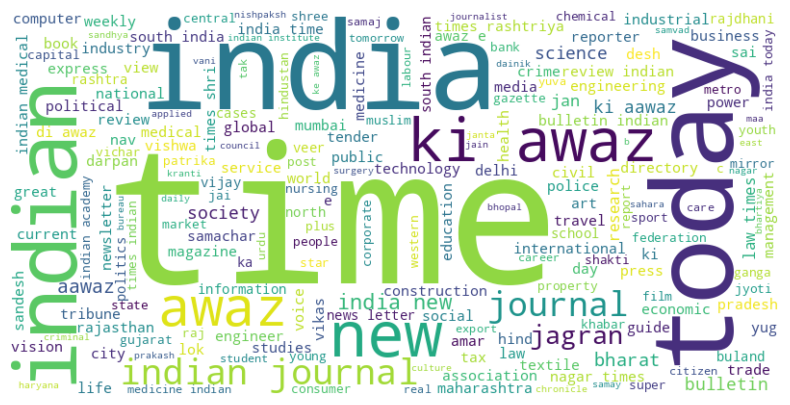

✅ Processing completed. Cleaned data saved as '/content/Final_Cleaned_Data.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.metrics import jaccard_distance
from nltk.util import ngrams
from metaphone import doublemetaphone
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = "/content/Fully_Cleaned_Titles_Final (1).xlsx"  # Update if needed
df = pd.read_excel(file_path)

# Standardize column names
df.columns = df.columns.str.strip()

# Define title column
title_column = "Title Name in Lower"  # Update if needed

# Define common prefixes & suffixes
common_words = ["The", "India", "News", "Daily", "Times", "Report"]

# Function to clean titles
def clean_title(title):
    words = title.split()
    words = [word for word in words if word not in common_words]
    return " ".join(words)

df["Cleaned_Title"] = df[title_column].astype(str).apply(clean_title)

# Enforce Restricted Words Guidelines
restricted_words = ["Crime", "CBI", "Army"]
df["Contains_Restricted"] = df["Cleaned_Title"].apply(lambda x: any(word in x.split() for word in restricted_words))
df = df[~df["Contains_Restricted"]]  # Remove titles containing restricted words

# Phonetic Matching (Metaphone)
df["Metaphone"] = df["Cleaned_Title"].apply(lambda x: doublemetaphone(x)[0])

# Jaccard & Cosine Similarity
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Cleaned_Title"])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)
df["Max_Cosine_Similarity"] = [max(row) for row in cosine_sim]

# Compute Jaccard similarity
def jaccard_sim(title1, title2):
    set1, set2 = set(ngrams(title1.split(), 2)), set(ngrams(title2.split(), 2))  # Use bigrams
    if not set1 or not set2:
        return 0  # Avoid division by zero
    return len(set1 & set2) / len(set1 | set2)

df["Max_Jaccard_Similarity"] = df["Cleaned_Title"].apply(lambda title: max([jaccard_sim(title, other) for other in df["Cleaned_Title"] if title != other]))

# Uniqueness Score Calculation
df["Uniqueness_Score"] = (1 - df[["Max_Cosine_Similarity", "Max_Jaccard_Similarity"]].max(axis=1)) * 100

# Remove punctuation, extra spaces, and convert to lowercase
df["Cleaned_Title"] = df["Cleaned_Title"].str.replace(r'[^\w\s]', '', regex=True).str.strip().str.lower()

# Drop exact duplicates
df = df.drop_duplicates(subset=["Cleaned_Title"]).reset_index(drop=True)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df["Cleaned_Title"]))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save Final Cleaned Data
output_file = "/content/Final_Cleaned_Data.xlsx"

df.to_excel(output_file, index=False)
print(f"✅ Processing completed. Cleaned data saved as '{output_file}'.")
